# NLP

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.

Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.
- Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. The proposed test includes a task that involves the automated interpretation and generation of natural language.
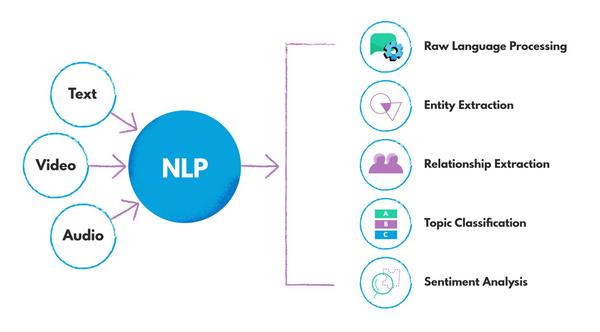

# NLP text preprocessing Techniques
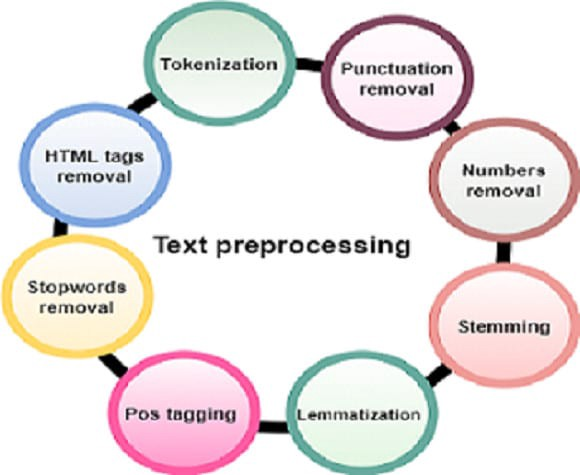

## Let's discuss one by one

# 1. Remove HTML Tags
- some time we get html tags while mining data from web which are not required, so remove it

In [1]:
# extrating data from web
from bs4 import BeautifulSoup
import requests

url = "https://en.wikipedia.org/wiki/2022_Russian_invasion_of_Ukraine"
response = requests.get(url)
htmlcontent = response.content
soup = BeautifulSoup(htmlcontent,"html.parser")

# soup

In [2]:
html_text = """
<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>2022 Russian invasion of Ukraine - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"455d343c-2094-4731-959e-ea361d02d3ab","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"2022_Russian_invasion_of_Ukraine","wgTitle":"2022 Russian invasion of Ukraine","wgCurRevisionId":1093168028,"wgRevisionId":1093168028,"wgArticleId":70149799,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 uses Russian-language script (ru)","CS1 Russian-language sources (ru)","CS1 Czech-language sources (cs)","CS1 Ukrainian-language sources (uk)","CS1 uses Ukrainian-language script (uk)","CS1 Hungarian-language sources (hu)",
"CS1 Italian-language sources (it)","CS1 maint: url-status","CS1 Turkish-language sources (tr)","CS1 French-language sources (fr)","CS1 Indonesian-language sources (id)","Articles with short description","Short description is different from Wikidata","Wikipedia indefinitely move-protected pages","Wikipedia extended-confirmed-protected pages","EngvarB from April 2022","Use dmy dates from May 2022","Interlanguage link template existing link","Wikipedia articles in need of updating from April 2022","All Wikipedia articles in need of updating","All articles with unsourced statements","Articles with unsourced statements from June 2022","Articles with BNF identifiers","Articles with LNB identifiers","Articles with NKC identifiers","Articles containing video clips","2022 Russian invasion of Ukraine","2022 controversies","Russo-Ukrainian War","Ongoing conflicts in Europe","Conflicts in 2022","February 2022 events in Ukraine","March 2022 events in Ukraine","April 2022 events in Ukraine",
"""

In [3]:
import re
without_tags = re.sub('<.*?>',"",html_text)

In [4]:
without_tags

'\n\n\n\n\n\n2022 Russian invasion of Ukraine - Wikipedia\ndocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"455d343c-2094-4731-959e-ea361d02d3ab","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"2022_Russian_invasion_of_Ukraine","wgTitle":"2022 Russian invasion of Ukraine","wgCurRevisionId":1093168028,"wgRevisionId":1093168028,"wgArticleId":70149799,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 uses Russian-language script (ru)","CS1 Russian-language sources (ru)","CS1 Czech-language sources (cs)","CS1 Ukrainian-language sources (uk)","CS1 uses Ukrainian-language script (uk)","CS1 Hung

# 2. Remove URL and Extract URL
- for the case url are not usefull, better to remove it or if it is required extract it

## i. Remove URL

In [5]:
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [6]:
text1='Check out my notebook https://www.kaggle.com/campusx/notebook8223fc1abb'
text2='Check out my notebook http://www.kaggle.com/campusx/notebook 8223fc1abb'
text3 = 'Google search here www.google.com'
text4 = 'For notebook click https://www.kaggle.com/campusx/notebook 8223fc1abb to search check www.google.com'
text = [text1,text2,text3,text4]

In [7]:
remove_url(text1)

'Check out my notebook '

In [8]:
remove_url(text2)

'Check out my notebook  8223fc1abb'

In [9]:
remove_url(text4)

'For notebook click  8223fc1abb to search check '

## ii. Extract URL

In [10]:
re.findall('https?://\S+|www\.\S+',text1)

['https://www.kaggle.com/campusx/notebook8223fc1abb']

In [11]:
re.findall('https?://\S+|www\.\S+',text2)

['http://www.kaggle.com/campusx/notebook']

In [12]:
re.findall('https?://\S+|www\.\S+',text4)

['https://www.kaggle.com/campusx/notebook', 'www.google.com']

## URL extractor library

In [13]:
!pip install urlextract

In [14]:
from urlextract import URLExtract
extract = URLExtract()  # object of urlextract, this will extract url from the msgs
print(extract.find_urls(text4))

['https://www.kaggle.com/campusx/notebook', 'www.google.com']


# 3. Remove Punctuations

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punc(text):
    for char in string.punctuation:
        text = text.replace(char,' ')
    return text

In [17]:
without_tags

'\n\n\n\n\n\n2022 Russian invasion of Ukraine - Wikipedia\ndocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"455d343c-2094-4731-959e-ea361d02d3ab","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"2022_Russian_invasion_of_Ukraine","wgTitle":"2022 Russian invasion of Ukraine","wgCurRevisionId":1093168028,"wgRevisionId":1093168028,"wgArticleId":70149799,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 uses Russian-language script (ru)","CS1 Russian-language sources (ru)","CS1 Czech-language sources (cs)","CS1 Ukrainian-language sources (uk)","CS1 uses Ukrainian-language script (uk)","CS1 Hung

In [18]:
remove_punc(without_tags)

'\n\n\n\n\n\n2022 Russian invasion of Ukraine   Wikipedia\ndocument documentElement className  client js  RLCONF   wgBreakFrames  false  wgSeparatorTransformTable           wgDigitTransformTable           wgDefaultDateFormat   dmy   wgMonthNames       January   February   March   April   May   June   July   August   September   October   November   December    wgRequestId   455d343c 2094 4731 959e ea361d02d3ab   wgCSPNonce  false  wgCanonicalNamespace      wgCanonicalSpecialPageName  false  wgNamespaceNumber  0  wgPageName   2022 Russian invasion of Ukraine   wgTitle   2022 Russian invasion of Ukraine   wgCurRevisionId  1093168028  wgRevisionId  1093168028  wgArticleId  70149799  wgIsArticle  true  wgIsRedirect  false  wgAction   view   wgUserName  null  wgUserGroups         wgCategories    CS1 uses Russian language script  ru    CS1 Russian language sources  ru    CS1 Czech language sources  cs    CS1 Ukrainian language sources  uk    CS1 uses Ukrainian language script  uk    CS1 Hung

In [19]:
# faster then previous method(use for big dataset)
without_tags.translate(str.maketrans('','',string.punctuation))

'\n\n\n\n\n\n2022 Russian invasion of Ukraine  Wikipedia\ndocumentdocumentElementclassNameclientjsRLCONFwgBreakFramesfalsewgSeparatorTransformTablewgDigitTransformTablewgDefaultDateFormatdmywgMonthNamesJanuaryFebruaryMarchAprilMayJuneJulyAugustSeptemberOctoberNovemberDecemberwgRequestId455d343c20944731959eea361d02d3abwgCSPNoncefalsewgCanonicalNamespacewgCanonicalSpecialPageNamefalsewgNamespaceNumber0wgPageName2022RussianinvasionofUkrainewgTitle2022 Russian invasion of UkrainewgCurRevisionId1093168028wgRevisionId1093168028wgArticleId70149799wgIsArticletruewgIsRedirectfalsewgActionviewwgUserNamenullwgUserGroupswgCategoriesCS1 uses Russianlanguage script ruCS1 Russianlanguage sources ruCS1 Czechlanguage sources csCS1 Ukrainianlanguage sources ukCS1 uses Ukrainianlanguage script ukCS1 Hungarianlanguage sources hu\nCS1 Italianlanguage sources itCS1 maint urlstatusCS1 Turkishlanguage sources trCS1 Frenchlanguage sources frCS1 Indonesianlanguage sources idArticles with short descriptionShort 

# 4. Chat Word Treatment
- asap ----> as soon as possible
- gn ------> good night
- gm ------> good morning
- fyi -----> for your information
- ttyl ----> talk to you later

In [20]:
import pandas as pd
slang = pd.read_csv('../input/chart-words/slang.csv',usecols=['abb'])

In [21]:
slang['meaning']=slang['abb'].str.split('=').str[1]
slang['abb'] = slang['abb'].str.split('=').str[0]


In [22]:
slang.head(5)

,abb,meaning
0,AFAIK,As Far As I Know
1,AFK,Away From Keyboard
2,ASAP,As Soon As Possible
3,ATK,At The Keyboard
4,ATM,At The Moment


In [23]:
# df to dict
d= {}
for i in range(slang.shape[0]):
    d[slang['abb'].loc[i]] = slang['meaning'].loc[i]

In [24]:
t = 'IMHO he is the best'

In [25]:
def chat_convert(string): 
    t_ls = []
    for text in string.split():
        if text.upper() in d:
            t_ls.append(d[text.upper()])
        else: t_ls.append(text)
    t_ls = " ".join(t_ls)
    return t_ls

In [26]:
chat_convert(t)

'In My Honest/Humble Opinion he is the best'

In [27]:
chat_convert('FYI delhi is the capital')

'For Your Information delhi is the capital'

# 5. Spelling Correction
- ntbook ----> notebook
- preprcesing ---> preprocessing


## methods:
    1. pyspellchecker
    2. nltk 
    3. textblob

## using Textblob

In [28]:
!pip install textblob

In [29]:
docx='''Peoplee have traveledd through and inhabeeted the Toronto area, located on a broad sloping plateau interspersed with rivers, 
      deep ravines, and urban forst, for more than 10,000 years.[18] After the broadliy disputed Torronto Purchase, when the 
      Mississauga surrendered the area to the British Crown,[19] the British establised the town of York in 1793 and later 
      designeted it as the capital of Upper Canada.[20] During the War of 1812, the town was the site of the Battle of York and 
      '''

In [30]:
from textblob import TextBlob
import re

str=re.findall("[a-zA-Z,.]+",docx)
updated_docx=(" ".join(str))
print(updated_docx)

Peoplee have traveledd through and inhabeeted the Toronto area, located on a broad sloping plateau interspersed with rivers, deep ravines, and urban forst, for more than , years. After the broadliy disputed Torronto Purchase, when the Mississauga surrendered the area to the British Crown, the British establised the town of York in and later designeted it as the capital of Upper Canada. During the War of , the town was the site of the Battle of York and


In [31]:
!pip install spellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966515 sha256=32cada5025ca6a092e609dd3f9a1461a25749abfaf279b5ffc6d7b79bfec9d7a
  Stored in directory: /root/.cache/pip/wheels/58/e9/48/b82b733a7a0a9cc52ed239ccf082ff33e2fbda71670ddd3349
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7141 sha256=45f6a1eddec37c8f75e383945e531603431c7c6c5ef1ae1ea48fc8341a0e9cd1
  Stored in directory: /root/.cache/pip/wheels/3c/f3/5d/77e8983e86af1c3c62b80d76de8020f560ce6367f1b2763b40
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8483 sha256=e985792308e953e68955499f1644748cc4fa269b5dc3ebbfc11d615b4873a38a
  Stored in directory: /root/.cache/pip/whee

In [32]:
new_doc = TextBlob(updated_docx)

result = new_doc.correct()

print(result)

People have traveled through and inhabited the Toronto area, located on a broad sloping plateau interspersed with rivers, deep ravines, and urban first, for more than , years. After the broadly disputed Torronto Purchase, when the Mississauga surrendered the area to the British Grown, the British established the town of Work in and later designed it as the capital of Upper Canada. During the War of , the town was the site of the Battle of Work and


- Peoplee have traveledd through and inhabeeted ---> People have traveled through and inhabited

## uisng Pyspellchecker

In [33]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 2.5 MB/s eta 0:00:00


In [34]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['somthingg', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

somthing
{'somethingg', 'somthing'}
happenning
{'hapening', 'happenning'}


In [35]:
# from spellchecker import SpellChecker

# english = SpellChecker()  # the default is English (language='en')
# spanish = SpellChecker(language='es')  # use the Spanish Dictionary
# russian = SpellChecker(language='ru')  # use the Russian Dictionary

# 6. Remove Stopwords

In [36]:
from nltk.corpus import stopwords

In [37]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
# stopwords language support in nltk
print(stopwords.fileids())

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [39]:
def remove_stopwards(text):
    not_stopwards = []
    for t in text.split():
        if t in stopwords.words('english'):
            pass
        else: not_stopwards.append(t)
    return " ".join(not_stopwards)

In [40]:
remove_stopwards("I am wondering where I can find the full list of supported langs and their keys for the NLTK stopwords")

'I wondering I find full list supported langs keys NLTK stopwords'

In [41]:
remove_stopwards('Peoplee have traveledd through and inhabeeted the Toronto area, located on a broad sloping plateau interspersed with rivers')

'Peoplee traveledd inhabeeted Toronto area, located broad sloping plateau interspersed rivers'

# 7. Handling Emojis
😀😆🥹😂😇🧐🤪🤩🙄😮😶‍🌫️😯🥵👩🏾‍❤️‍💋‍👨🏽🙎‍♂️👗👘👠💍💍🦮🦢🐉

In [42]:
import re
def remove_emoji(text):
    emoji_pattern=re.compile("["                  
                           u"\U0001F600-\U0001F64F" #emoticons
                           u"\U0001F300-\U0001F5FF" #symbols&pictographs
                           u"\U0001F680-\U0001F6FF" #transport&map symbols
                           u"\U0001F1E0-\U0001F1FF" #flags(105)
                           u"\U00002702-\U00002780"
                           u"\U000024C2-\U0001F251"
                           "]+",flags=re.UNICODE)                       
    return emoji_pattern.sub(r'',text)

In [43]:
remove_emoji('hello 😀😆')

'hello '

In [44]:
import emoji

In [45]:
# extract emoji
e_text ='hello 😀😆🥹🤩 hi 🙄😮 there👨🏽♂️👘👠🦢'
for msg in e_text:
    if msg in emoji.UNICODE_EMOJI['en']:
        print(msg)

😀
😆
🥹
🤩
🙄
😮
👨
🏽
♂
👘
👠
🦢


In [46]:
# emoji meaning
print(emoji.demojize('hello 😆'))

hello :grinning_squinting_face:


In [47]:
print(emoji.demojize('🦢'))

:swan:


In [48]:
print(emoji.demojize('😀😆🥹😂😇🧐🤪🤩🙄😮🌫️😯🥵👩❤️‍💋‍👨🏽🙎‍♂️👗👘👠💍💍🦮🦢🐉🦢'))

:grinning_face::grinning_squinting_face::face_holding_back_tears::face_with_tears_of_joy::smiling_face_with_halo::face_with_monocle::zany_face::star-struck::face_with_rolling_eyes::face_with_open_mouth::fog::hushed_face::hot_face::woman:❤‍:kiss_mark:‍:man_medium_skin_tone::man_pouting::dress::kimono::high-heeled_shoe::ring::ring::guide_dog::swan::dragon::swan:


# 8. Tokenization
 i am boy ----> [i, am, boy]

- **Prefix**: Character(s)at the beginning
- **Suffix**: Character(s)at the end
- **Infix**: Character(s)in between
- **Exception**: Special-case rule to splitastring into several tokens or preventatoken from being split when punctuation rules are applied

1. Word tokenization
2. Sentence tokenization

## i. Simplest way for easy text
- using string split

In [49]:
text = "Voice-controlled assistants like Siri and Alexa.Natural language generation for question answering by customer service chatbots.Streamlining the recruiting process on sites like LinkedIn by scanning through people’s listed skills and experience.Tools like Grammarly which use NLP to help correct errors and make suggestions for simplifying complex writing.Language models like autocomplete which are trained to predict the next words in a text, based on what has already been typed."

In [50]:
# work token
print(text.split())

['Voice-controlled', 'assistants', 'like', 'Siri', 'and', 'Alexa.Natural', 'language', 'generation', 'for', 'question', 'answering', 'by', 'customer', 'service', 'chatbots.Streamlining', 'the', 'recruiting', 'process', 'on', 'sites', 'like', 'LinkedIn', 'by', 'scanning', 'through', 'people’s', 'listed', 'skills', 'and', 'experience.Tools', 'like', 'Grammarly', 'which', 'use', 'NLP', 'to', 'help', 'correct', 'errors', 'and', 'make', 'suggestions', 'for', 'simplifying', 'complex', 'writing.Language', 'models', 'like', 'autocomplete', 'which', 'are', 'trained', 'to', 'predict', 'the', 'next', 'words', 'in', 'a', 'text,', 'based', 'on', 'what', 'has', 'already', 'been', 'typed.']


In [51]:
# sentence tokenization
text.split('.')

['Voice-controlled assistants like Siri and Alexa',
 'Natural language generation for question answering by customer service chatbots',
 'Streamlining the recruiting process on sites like LinkedIn by scanning through people’s listed skills and experience',
 'Tools like Grammarly which use NLP to help correct errors and make suggestions for simplifying complex writing',
 'Language models like autocomplete which are trained to predict the next words in a text, based on what has already been typed',
 '']

 ## ii. Better then  split

In [52]:
import re
words = re.findall('[\w]+',text)
print(words)

['Voice', 'controlled', 'assistants', 'like', 'Siri', 'and', 'Alexa', 'Natural', 'language', 'generation', 'for', 'question', 'answering', 'by', 'customer', 'service', 'chatbots', 'Streamlining', 'the', 'recruiting', 'process', 'on', 'sites', 'like', 'LinkedIn', 'by', 'scanning', 'through', 'people', 's', 'listed', 'skills', 'and', 'experience', 'Tools', 'like', 'Grammarly', 'which', 'use', 'NLP', 'to', 'help', 'correct', 'errors', 'and', 'make', 'suggestions', 'for', 'simplifying', 'complex', 'writing', 'Language', 'models', 'like', 'autocomplete', 'which', 'are', 'trained', 'to', 'predict', 'the', 'next', 'words', 'in', 'a', 'text', 'based', 'on', 'what', 'has', 'already', 'been', 'typed']


In [53]:
text2 = "Natural language processing can be structured in many different ways using different machine learning methods according to what is being analysed. It could be something simple like frequency of use or sentiment attached, or something more complex. Whatever the use case, an algorithm will need to be formulated. The Natural Language Toolkit (NLTK) is a suite of libraries and programs that can be used for symbolic and statistical natural language processing in English, written in Python. It can help with all kinds of NLP tasks like tokenising (also known as word segmentation), part-of-speech tagging, creating text classification datasets, and much more."

In [54]:
sent = re.split('[.!?]',text2)

In [55]:
sent

['Natural language processing can be structured in many different ways using different machine learning methods according to what is being analysed',
 ' It could be something simple like frequency of use or sentiment attached, or something more complex',
 ' Whatever the use case, an algorithm will need to be formulated',
 ' The Natural Language Toolkit (NLTK) is a suite of libraries and programs that can be used for symbolic and statistical natural language processing in English, written in Python',
 ' It can help with all kinds of NLP tasks like tokenising (also known as word segmentation), part-of-speech tagging, creating text classification datasets, and much more',
 '']

## iii. better then above
 - use library (like - NLTK)


In [56]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [57]:
print(word_tokenize(text2))

['Natural', 'language', 'processing', 'can', 'be', 'structured', 'in', 'many', 'different', 'ways', 'using', 'different', 'machine', 'learning', 'methods', 'according', 'to', 'what', 'is', 'being', 'analysed', '.', 'It', 'could', 'be', 'something', 'simple', 'like', 'frequency', 'of', 'use', 'or', 'sentiment', 'attached', ',', 'or', 'something', 'more', 'complex', '.', 'Whatever', 'the', 'use', 'case', ',', 'an', 'algorithm', 'will', 'need', 'to', 'be', 'formulated', '.', 'The', 'Natural', 'Language', 'Toolkit', '(', 'NLTK', ')', 'is', 'a', 'suite', 'of', 'libraries', 'and', 'programs', 'that', 'can', 'be', 'used', 'for', 'symbolic', 'and', 'statistical', 'natural', 'language', 'processing', 'in', 'English', ',', 'written', 'in', 'Python', '.', 'It', 'can', 'help', 'with', 'all', 'kinds', 'of', 'NLP', 'tasks', 'like', 'tokenising', '(', 'also', 'known', 'as', 'word', 'segmentation', ')', ',', 'part-of-speech', 'tagging', ',', 'creating', 'text', 'classification', 'datasets', ',', 'and'

In [58]:
sent_tokenize(text2)

['Natural language processing can be structured in many different ways using different machine learning methods according to what is being analysed.',
 'It could be something simple like frequency of use or sentiment attached, or something more complex.',
 'Whatever the use case, an algorithm will need to be formulated.',
 'The Natural Language Toolkit (NLTK) is a suite of libraries and programs that can be used for symbolic and statistical natural language processing in English, written in Python.',
 'It can help with all kinds of NLP tasks like tokenising (also known as word segmentation), part-of-speech tagging, creating text classification datasets, and much more.']

In [59]:
sent = 'I have a Ph.D in A.I'
sent2="We're here to help! mail us at nks@gmail.com"
sent3='A 5km ride cost $10.50'

In [60]:
# problems
print(sent.split()) # split on space basis
print(sent2.split())
print(sent3.split())

['I', 'have', 'a', 'Ph.D', 'in', 'A.I']
["We're", 'here', 'to', 'help!', 'mail', 'us', 'at', 'nks@gmail.com']
['A', '5km', 'ride', 'cost', '$10.50']


split problem: **(!,km,$)** mark should be tokenize

In [61]:
print(re.findall('[\w]+',sent))
print(re.findall('[\w]+',sent2))
print(re.findall('[\w]+',sent3))

['I', 'have', 'a', 'Ph', 'D', 'in', 'A', 'I']
['We', 're', 'here', 'to', 'help', 'mail', 'us', 'at', 'nks', 'gmail', 'com']
['A', '5km', 'ride', 'cost', '10', '50']


re problem: Ph.D, A.I, 10.50 and mailid should be one word

In [62]:
print(word_tokenize(sent))
print(word_tokenize(sent2))
print(word_tokenize(sent3))

['I', 'have', 'a', 'Ph.D', 'in', 'A.I']
['We', "'re", 'here', 'to', 'help', '!', 'mail', 'us', 'at', 'nks', '@', 'gmail.com']
['A', '5km', 'ride', 'cost', '$', '10.50']


km should be tokenize, mailid should be one word
### so, not all are perfect to tokenize

## iv. Spacy

In [63]:
import spacy

In [64]:
nlp = spacy.load('en_core_web_sm')

In [65]:
for i in nlp(sent):
    print(i)

I
have
a
Ph
.
D
in
A.I


In [66]:
for i in nlp(sent2):
    print(i)

We
're
here
to
help
!
mail
us
at
nks@gmail.com


In [67]:
for i in nlp(sent3):
    print(i)

A
5
km
ride
cost
$
10.50


spacy doing better then others

# 9. Stemming
- In grammar, inflection is the modification of a word to express different grammatical categories such as tense, case, voice, aspect, person, number, gender, and mood.
- **inflection** meanig: add some(prefix, sufix, infix) text to original word to change thier meaning
    - like : do ---> doing, done, undoable
    - work : working, workable, worked
## Stemming: 
- "Stemming is the process of reducing inflection in words to their root forms such as **mapping a group of words to the same stem even if the stem itself is not a valid word in the Language**."
    - example: doing, done, undoable ----> do
    - working, workable, worked -------> work

In [68]:
from nltk.stem.porter import PorterStemmer

In [69]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [70]:
stem_words('work working workable worked')

'work work workabl work'

In [71]:
stem_words('walk walking walked')

'walk walk walk'

In [72]:
stem_words('movie sorry story ') # this is not valid word

'movi sorri stori'

- To overcome from above problem we use **lemmatization**

## if you need to show stemming result to user don't use stemming use **Lemmatization**

# Lemmatization
   - unlike Stemming,reduces the inflected words properly ensuring that the **root word belongs to the language**.
   - In Lemmatization root word is called **Lemma**. A lemma(plural lemmas or lemmata)is the canonical form,dictionary form,or citation form ofaset of words.
   - this is word search in dictionary so that get actual word belong to language
   
#### **wordnet** - a dictionary where all english words are stored with related words
   * Lemmatization is slower then stemming because words are get searched from dictionary where stemming is a alorithm based technique thats why it work faster

In [73]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence="He was running and eating at same time.He has bad habit of swimming after playing long hours in the Sun."
def get_lemma(sentence,pos='n'):
    punctuations="?:!.,;"

    sentence_words=nltk.word_tokenize(sentence)

    for word in sentence_words:
        if word in punctuations:
            sentence_words.remove(word)

    print("{0:20}{1:20}".format("Word","Lemma"))
    for word in sentence_words:
        print("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos=pos)))


In [74]:
get_lemma(sentence) # still same because it required pos parameter

Word                Lemma               
He                  He                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time.He             time.He             
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in                  in                  
the                 the                 
Sun                 Sun                 


In [75]:
get_lemma(sentence,pos='v') # pos as verb=v,noun=n

Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time.He             time.He             
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 
